# 1 sample z test 
- Use to compare sample mean with the population mean. Determines if the sample mean is significantly different from the population  mean.
- The population standard deviation  is known
- The sample size n > 30
z score = sample mean($\bar{x}$) - pop mean($\mu$)/pop std($\sigma$)
     * calculate the z score, then depending on how far the z score is from the mean, if above 3 zscores we reject the nulll hypothesis

In [ ]:
# Process
"""
1. Write the null and alternative hypotheses you would use to test this claim.
2. Set the significance level alpha to 0.05.
3.  Calculate the z score statistic using the formula z = (x - μ) / (σ/sqrt(n)
5. Calculate the p value using the z score. or using statsmodels.stats.weightstats.ztest
6. Compare the p value to the significance level alpha.
"""

import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm    
import matplotlib.pyplot as plt
import statsmodels.stats.weightstats as ws

#1.write the null and alternate hypothesis
#H0: The average weight of the population is 100
#H1: The average weight of the population is not 100

#2. set the significance level alpha to 0.05
alpha = 0.05

#3. Calculate the z score statistic using the formula z = (x - μ) / (σ/sqrt(n)
z = (110 - 100) / (15/np.sqrt(36))
print("Z score is: ", z)

#4. Calculate the p value using the z score. or using statsmodels.stats.weightstats.ztest
p = 2 * (1 - stats.norm.cdf(z))# 2 * (1 - stats.norm.cdf(z)) is used for two-tailed test. Stats.norm.cdf(z) gives the area under the curve to the left of z.
#we use cdf instead of pdf because we are calculating the area under the curve. pdf gives the value of the curve at a particular point.

#5. Compare the p value to the significance level alpha.
if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

#once we have the z score of a value we can also get the p value using the stats.norm.cdf
p_value = stats.norm.cdf(z) #this gives the probability of getting a value less than z
p_value = 1 - stats.norm.cdf(z) #this gives the probability of getting a value greater than z
p_value = 2 * (1 - stats.norm.cdf(z)) #this gives the probability of getting a value greater than z or less than -z


#method 2 using statsmodels.stats.weightstats.ztest
data = np.random.normal(loc=110, scale=15, size= 36) #generate random numbers with a mean of 110 and standard deviation of 15 and 36 samples

#z statistic and p value
z_stat, p_val = ws.ztest(data, value=100) #data is the sample data, value is the population mean
print("Z score is: ", z_stat)
print("P value is: ", p_val)
or 

#to get the confidence intervals   
conf_int = ws.zconfint(data)
print("Confidence interval is: ", conf_int)

or #USING stats.norm.ppf to get the confidence intervals
lower_bound = stats.norm.ppf(alpha/2, loc=110, scale=15/np.sqrt(36))
upper_bound = stats.norm.ppf(1-alpha/2, loc=110, scale=15/np.sqrt(36))

or #calculate the z critical value, then get the se then get the confidence intervals
alpha = 1 - confidence_level
z_critical = stats.norm.ppf(1 - alpha / 2)

# Calculate standard error of the mean (SEM)
sem = sample_std / np.sqrt(n)

# Calculate margin of error
margin_of_error = z_critical * sem

# Calculate confidence interval
conf_low = sample_mean - margin_of_error
conf_high = sample_mean + margin_of_error

conf_low, conf_high

# 1 sample t test
- When comparing the sample mean to a known population mean.
- The population standard deviation is unknown.
- The sample size is small (typically n<30).


In [ ]:
# write the null and alternate hypothesis
#H0: The average weight of the population is 100
#H1: The average weight of the population is not 100

#2. Set the significance level
alpha = 0.05

#3. calculate the t statistic
t_stat = (110 - 100) / (15/np.sqrt(36)) #t = (x - μ) / (σ/sqrt(n)). sample mean is 110, population mean is 100, standard deviation is 15 and sample size is 36

#4. get the p value
p = 2 * (1 - stats.t.cdf(t_stat, df=35)) # df is the degrees of freedom which is n-1. n is the sample size

#method 2 using scipy.stats.ttest_1samp
import scipy.stats as stats
t_stat, p_val = stats.ttest_1samp(a= data, popmean=100, alternative= 'two-sided') #a is the sample data, popmean is the population mean




## To get the confidence interval 
- Get the significance  level($\alpha$) = 1- confidence level
- Get the se = pop std dev/ sqrt(sample size n)
- Get the t critical value = stats.t.ppf(1 - alpha/2, df= n- 1)
- Margin of error = t_critical * standard error(se)
- Confidence interval  = sample_mean - margin_of_error, sample_mean + margin_of_error

In [ ]:
#to get the confidence interval. Confidence interval is the range of values within which the population parameter is likely to fall.
#5. get the confidence interval
se = 15/np.sqrt(36) #standard error
#confidence level = 1 - alpha. For 95% confidence level, alpha is 0.05. So, confidence level is 0.95
confidence_level = 0.95
#critical value
t_critical = stats.t.ppf(1 - alpha/2, df=35) #ppf is the percent point function. It gives the critical value for the t-distribution
#margin of error
margin_of_error = t_critical * se
#confidence interval = sample_mean - margin_of_error, sample_mean + margin_of_error
confidence_interval = (110 - margin_of_error, 110 + margin_of_error)


# 2 sample ttest- Independent samples
- Comparing the means of two independent groups. Determines if there is a significant difference between the means of two independent groups.
- the groups are not related.

* Assumptions:
   - Normality: The data in each group should be approximately normally distributed. This is especially important for small sample sizes.
   - Independence: The observations in each group should be independent of each other.
   - Homogeneity of variances (Homoscedasticity): The variances of the two groups should be approximately equal.

In [ ]:
#calculate the 2 sample t test
#1. write the null and alternate hypothesis
#H0: The average weight of the population is the same for both groups
#H1: The average weight of the population is different for the two groups

#2. set the significance level
alpha = 0.05

#3. calculate the t statistic
#Class A: Xˉ1​=85, s1​=10, n1​=30
#Class B: Xˉ2​=80, s2​=12, n2​=35

#t_stat = difference_in_means/ pooled_standard_error
#pooled_standard_error = std1/√n1 + std2/√n2 or sqrt((s1**2/n1) + (s2**2/n2))
# difference_in_means = mean1 - mean2
t_stat = (85 - 80) / np.sqrt((10**2/30) + (12**2/35))

# degree of freedom. df= n1 + n2 - 2
#4. get the p value. We want the area under the curve for both tails
p = 2 * (1 - stats.t.cdf(t_stat, df= 63)) # it is 1 - cdf because we want the area under the curve to the right of the t_stat then multiply by 2
#because it is a two-tailed test

#method 2 using scipy.stats.ttest_ind. Assumes that the  two samples have equal variances.
import scipy.stats as stats
# Sample data
class_A_scores = [85, 78, 90, 88, 76, 93, 85, 79, 91, 82, 87, 84, 80, 86, 89, 83, 77, 88, 92, 84, 81, 86, 79, 87, 85, 82, 90, 88, 78, 85]
class_B_scores = [80, 75, 78, 85, 76, 89, 84, 79, 82, 77, 81, 80, 86, 83, 88, 82, 79, 75, 87, 80, 78, 82, 76, 81, 83, 80, 84, 78, 85, 79, 77, 81, 80, 84, 86]

# Perform the 2-sample independent t-test (equal variances assumed)
t_statistic, p_value = stats.ttest_ind(class_A_scores, class_B_scores)#if you assume unequaal variance you set equal_var=False

#t_statistic, p_value = stats.ttest_ind(class_A_scores, class_B_scores, equal_var=False)





## Checking Assumptions:

- Before performing the t-test, it's good practice to check the assumptions:

    - Normality: Use visual inspection (e.g., Q-Q plots) or statistical tests (e.g., Shapiro-Wilk test) to assess normality.
    - Homogeneity of Variances: Use tests like Levene's test to assess the equality of variances.

### Normality of the distribution  - QQ plot or Shapiro test


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

# Q-Q plot for Class A
sns.histplot(class_A_scores, kde=True)
plt.title('Histogram of Class A Scores')
plt.show()

# Q-Q plot for Class B
sns.histplot(class_B_scores, kde=True)
plt.title('Histogram of Class B Scores')
plt.show()

# Shapiro-Wilk test for normality
shapiro_A = shapiro(class_A_scores)
shapiro_B = shapiro(class_B_scores)
print(f"Shapiro-Wilk test for Class A: {shapiro_A}")
print(f"Shapiro-Wilk test for Class B: {shapiro_B}")

### Homogenity of variances - Use Levene test from scipy.stat import Levene

In [ ]:
from scipy.stats import levene

# Levene's test for equality of variances
levene_test = levene(class_A_scores, class_B_scores)
print(f"Levene's test: {levene_test}")

# Paired t-test- Determines if there is a significant difference between the means of two related groups.
- Compare means of two related groups
- The two groups are paired or matched in some way (e.g., pre-test and post-test on the same subjects).

* Assumptions: 
    1. Paired Observations: Ensure the data consists of matched pairs (e.g., the same individuals measured twice).
    2. Continuous Data: Check that the data is continuous and not categorical.
    3. Random Sampling:  Verify that the sample was randomly selected.

    4. Normality of Differences:Use a normality test (e.g., Shapiro-Wilk test) or graphical methods (e.g., Q-Q plot) to assess the normality of the differences.
     - For small sample sizes (n<30n<30), normality is more critical. For larger sample sizes, the t-test is robust to violations of normality due to the Central Limit Theorem.

    5. Independence within Pairs: Ensure that the differences within each pair are independent.

In [1]:
"""
Steps:
1. Create a new column with results of the difference between after and before the treatment.
2. Calculate the mean difference-  mean diff = sum of differences / number of differences
3. Calculate the standard deviation of the differences = sqrt(((sum of (each difference - mean diff))**2) / (n-1))
4. Calculate the standard error of the differences = standard deviation of differences / sqrt(n)
5. Calculate the t statistic = mean diff / standard error of differences
6. Get the p value using the t statistic
"""

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

#weight before treatment
before = [100, 105, 95, 110, 90, 85, 105, 95, 100, 110]
#weight after treatment
after = [95, 100, 90, 105, 85, 80, 100, 90, 95, 105]

#1. Create a new column with results of the difference between after and before the treatment.
difference = [after - before for after, before in zip(after,before)]

#2. Calculate the mean difference
mean_diff = np.mean(difference)

#3. Calculate the standard deviation of the differences
std_diff = np.sqrt((np.sum([(diff - mean_diff)**2 for diff in difference]) / (len(difference) - 1)))

#4. Calculate the standard error of the differences
se_diff = std_diff / np.sqrt(len(difference))

#5. Calculate the t statistic
t_stat = mean_diff / se_diff

#6. Get the p value using the t statistic
p = 2 * (1 - stats.t.cdf(t_stat, df= len(difference) - 1)) #multiply by 2 for two-tailed test

#2.method 2 using scipy.stats.ttest_rel
t_stat, p_val = stats.ttest_rel(a= after, b= before, alternative= 'two-sided')


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11296\1130485945.py:35: RuntimeWarning: divide by zero encountered in scalar divide
  t_stat = mean_diff / se_diff
c:\Users\ADMIN\anaconda3\envs\chika\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


## normality 
 - The Shapiro-Wilk test checks for normality of the differences.
 - The Q-Q plot visually assesses the normality of the differences.
 - The histogram provides another visual check for normality.

Shapiro-Wilk Test p-value: 0.011389750804650416


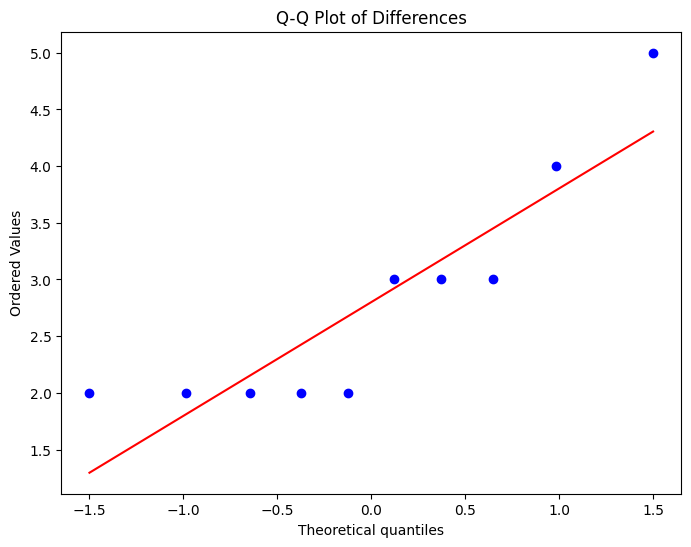

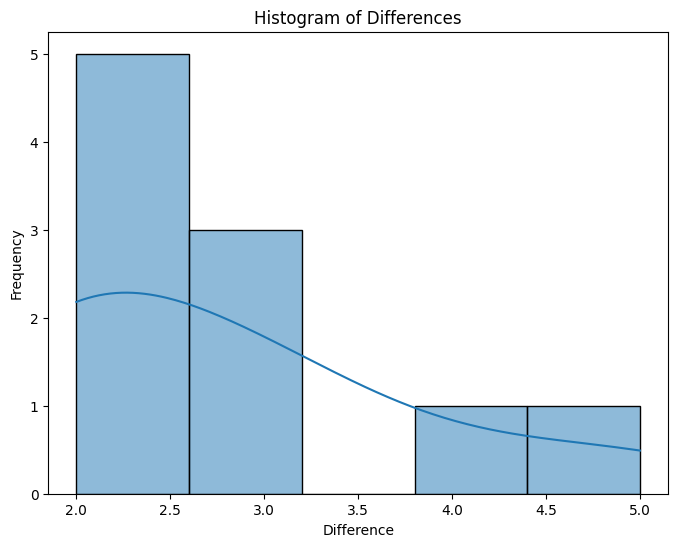

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
before = np.array([85, 78, 92, 70, 88, 75, 80, 69, 77, 84])
after = np.array([80, 75, 89, 68, 84, 73, 77, 67, 75, 82])

# Calculate differences
differences = before - after

# Check normality of differences
shapiro_test = stats.shapiro(differences)
print(f'Shapiro-Wilk Test p-value: {shapiro_test.pvalue}')

# Plot Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(differences, dist="norm", plot=plt)
plt.title('Q-Q Plot of Differences')
plt.show()

# Plot histogram of differences
plt.figure(figsize=(8, 6))
sns.histplot(differences, kde=True)
plt.title('Histogram of Differences')
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.show()


# effect size 
- small effect Cohen d = 0.2 
- Medium effect Cohen d = 0.5 
- large effect cohen d = 0.8

In [ ]:
# cohen's d method
#define a function that takes in two samples, calculates their means, length of the two samples, pooled variance and returns the cohen's d value
def cohen_d(group1, group2):
    #calculate the means of the groups
    mean1 = group1.mean()
    mean2 = group2.mean()

    #calculate the lengths of the two groups
    n1, n2 = len(group1), len(group2)

    #get the variance of the two groups
    group1_var = group1.var()
    group2_var = group2.var()

    #Calculate the pooled variance
    pooled_variance = (n1 * group1_var + n2 *group2_var)/(n1+ n2) 

    #calculate the effect size
    d = (mean1- mean2)/np.sqrt(pooled_variance)

# Power
- Type I Error (α): The probability of rejecting the null hypothesis when it is true (false positive).
- Type II Error (β): The probability of failing to reject the null hypothesis when it is false (false negative).
- Power (1 - β): The probability of correctly rejecting a false null hypothesis

* Factors affecting power
1. Effect size( calculate use cohen's d)- The higher the effect the higher the power.
2. significance level -  $\alpha$ - the higher the significance level the higher the power
3. sample size - Larger sample sizes provide more information and increase power.
4. Variability - lower variability in data increases the power.
5. One tailed test - has more power than a two tailed test.

In [ ]:
"""
 Calculating power
- You need:
     1. Sample size(nobs)- no of observations, eg nobs = np.array(range(5,1500))
     2. Effect size
     3. significance level - alpha 
     4. df= degree of freedom n-1
     Formula : statsmodels.stats.power.TTestPower.power
      TTestPower.power(effect_size, nobs, alpha, df=None, alternative='two-sided')
"""
from statsmodels.stats.power import TTestIndPower, TTestPower
#form normal distribution -> statsmodels.stats.power.NormalIndPower

#define the power analysis object
power_analysis = TTestIndPower() #if comparing two groups, independent T-test we use ratio 
"""
Suppose you are designing a study to compare the means of two groups using an independent t-test.
 If you expect one group to have twice as many participants as the other, you would set ratio=2.0.
"""

#calculate the power
power  = power_analysis.solve_power(effect_size=0.5, nobs1=100, alpha=0.5, ratio=1.0, alternative_='two-sided')

print(power)


#calculate the sample size
sample_size = power_analysis.solve_power(effect_size=0.5, alpha=0.5,ratio=1.0, power=0.8, alternative='two-sided')

#calculate the effect size
effect_size = power_analysis.solve_power(nobs1=100, alpha=0.5, ratio=1.0, power=0.8, alternative='two-sided')


# Linear regression - relationship
- Used to compare relationship  between two  continuous random variables.
- To determine strength and direction of the relationship.
 - X the independent variable
 - Y is the dependent variable
 - both $\beta$ and $\beta$ 1(x) are MODEL PARAMETERs
 - "fitting" a model means finding the best value for these parameters. 
 * LINE OF BEST FIT/REGRESSION LINE-> this is basically a line that minimizes the sum of squared errors between y values and values
on the line with corresponding x values.

 1. Set your null hypothesis and alternative hypothesis for both intercept and slope
    - intercept H0: b0 = 0
    -           H1: b0 != 0 
    SLOPE H0: b1 = 0 
    -     H1: b1 != 0 
    - ALPHA = 0.05
 2. set up your x and y values from the dataframe
 3. If you using statsmodels.api as sm, change the x value to X-> reshape it to a (-1,1) 2D array.
 4. change X to x-> by adding a constant using sm.add_constant(X)
 5. Fit your model ->model= sm.OLS(y,x).fit()
 6. get summary of the model. Confirm if f_pvalue is < or > alpha 0.05. Use it to reject or fail to reject a null hypothesis.
 



* can do the above to compare different models and compare f_pvalue->to see if model is statitistically significant thus reject null hypothesis.
- compare r^2(coefficient of determination) -> to see the model can explain which % variation of the y values from the predicted values. If value is closer to 1 the better the model.
- compare each coefficient/parameter(m and c ) and see how it compares with the x value.eg if x is 0 y increases 5 times.->model.params, model.pvalues

After:
1. Get predicted values -> predictions = model.predict(x)
2. PLot the model and fit the regression line. PLotting the model-> sns.scatterplot
 - regression line->plt.plot(X,predictions, color=, label='Regression line')

 3. Get the residuals. y - predictions
 4. Plot the residuals ->sns.residplot(x=predictions, y=residuals,lowess= True,color='green', scatter_kws={'alpha': 0.5}). Residuals should have no pattern at all.

* Assumptions:  LINE
1. LINEARITY->Relationship between dependent and independent variable should be linear
- Use a simple scatter plot to test it.Plot x against y.
- or use rainbow test.from statsmodels.stats.diagnostic import linear_rainbow
     -  linear_rainbow(linear_results).linear_rainbow is a function that takes an OLS results object and returns a test statistic and a p-value.
     - (0.8888211560283957, 0.7634250654991752). p value > than 0.05 so we fail to reject the null hypothesis and can consider the relationship to be linear
     -linear_rainbow(non_linear_results)-> (1.907684636312535, 4.178078921300679e-06). This is much lower than the standard alpha of 0.05, so we reject the null hypothesis and do not consider the relationship to be linear




2. iNDEPENDENCE->to ensure the values can be used to predict each other. Independence between the residuals and the observed values or between 
the residuals and the predicted values.
- Can use the scipy.stats or numpy to test for correlation. 
- import numpy as np
- from scipy.stat import pearsonr

-# Compute the correlation matrix
correlation_matrix = np.corrcoef(data['TV'], data['Radio'])

-# Extract the correlation coefficient
correlation_coefficient = correlation_matrix[0, 1]

print("Correlation coefficient between TV and Radio:", correlation_coefficient) . If value >0.8 very high correlation. Change in one leads to change in the other.

or
-correlation_coefficient, p_value = pearsonr(data['TV'], data['Radio'])

print("Pearson correlation coefficient between TV and Radio:", correlation_coefficient)
print("P-value:", p_value)


3. NORMALITY. the residuals- errors should be normally distributed. There should be no pattern. if the patterns are all over then there is a normal distribution.Use scatter plot of predictions and residuals.
- use a qq plot of the residuals and jarque bera test
     Fit a linear regression model and obtain the residuals.
     Create a Q-Q plot to visually inspect the normality of the residuals.
     Perform the Jarque-Bera test to statistically test for normality or Shapiro wilk test


<Figure size 1000x600 with 0 Axes>

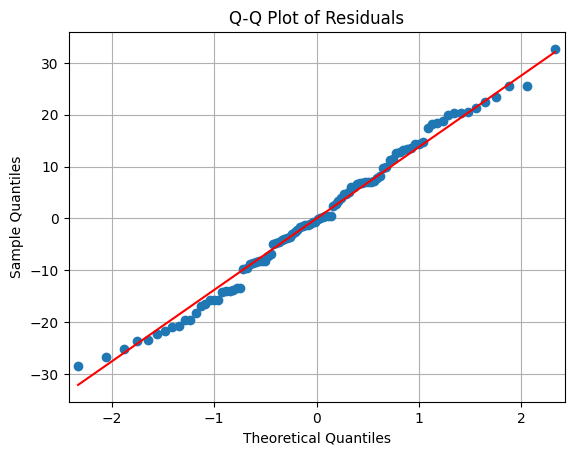

Jarque-Bera test statistic: 2.0316448399729437
Jarque-Bera p-value: 0.3621045053573639
Residuals appear to be normally distributed (fail to reject the null hypothesis).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import jarque_bera

# Example data
np.random.seed(0)
data = pd.DataFrame({
    'TV': np.random.uniform(0, 100, 100),
    'Sales': np.random.normal(30 + 0.4 * np.random.uniform(0, 100, 100), 10)
})

# Extracting X (TV) and y (Sales)
X = data['TV'].values.reshape(-1, 1)
y = data['Sales'].values

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predictions
predictions = model.predict(X)

# Residuals
residuals = y - predictions

# Q-Q plot
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.grid(True)
plt.show()

# Jarque-Bera test
jb_stat, jb_p_value = jarque_bera(residuals)

print("Jarque-Bera test statistic:", jb_stat)
print("Jarque-Bera p-value:", jb_p_value)

# Interpretation
if jb_p_value > 0.05:
    print("Residuals appear to be normally distributed (fail to reject the null hypothesis).")
else:
    print("Residuals do not appear to be normally distributed (reject the null hypothesis).")



4. EQUAL VARIANCE.Homoscedasticity in nature. Scatter plot of the variables form no shape. No pattern detected.
- USE BREUSCH PAGAN TEST TO TEST FOR HOMOSCEDASTICITY, OR goldfeldquandt


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan/ het_goldfeldquandt

# Example data
np.random.seed(0)
data = pd.DataFrame({
    'TV': np.random.uniform(0, 100, 100),
    'Sales': np.random.normal(30 + 0.4 * np.random.uniform(0, 100, 100), 10)
})

# Extracting X (TV) and y (Sales)
X = data['TV'].values.reshape(-1, 1)
y = data['Sales'].values

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Use statsmodels to add a constant and fit the OLS model
X_with_const = sm.add_constant(X)
ols_model = sm.OLS(y, X_with_const).fit()

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(ols_model.resid, ols_model.model.exog)# ols_Model.resid extracts the residuals and ols_model.model.exog extracts the exogenous variables(INDEPENDENTE VARIABLES)
#ENDOGENOUS VARIABLES(DEPENDENT VARIABLES) are the residuals

print("Breusch-Pagan test statistic:", bp_test[0])
print("p-value:", bp_test[1])
print("F-statistic:", bp_test[2])
print("F-test p-value:", bp_test[3])

# Interpretation
if bp_test[1] > 0.05:
    print("Fail to reject the null hypothesis of homoscedasticity.")
else:
    print("Reject the null hypothesis of homoscedasticity (evidence of heteroscedasticity).")

## When to Use Linear Regression:- Use a scatter plot to determine if relationship is linear or non-linear
- then draw a line between 

- Linear regression is used when you want to:
   1.  Predict an outcome: You have a variable (dependent variable) that you want to predict based on another variable (independent variable).
   2.  Understand the relationship: You want to understand how changes in the independent variable are associated with changes in the dependent variable.
   3.  Modeling: It's used in modeling scenarios where you assume a linear relationship between variables.
   y = $\beta$ 0 + $\beta$ 1(x) + e 
    - e -> is the model loss :
           - vertical distance between the individual data points and the line are taken into account to calculate the overall model loss.
   - $\beta$ 0  -> constant 
   - $\beta$ 1 -> coefficient/slope of x
   - e is the error term. Away from the normal linear regression line.
           - # like linear equation:where y = c + mx
           - #linear regression equation: y = b0 + b1x 
           - y = 4 + 3 x #y is the dependent variable, x is the independent variable, 4 is the intercept, 3 is the slope. 
           - #for every increase of x, y increases 3 times. 
         - y = 4 + 5 x #steeper slope. For every increase of x, y increases 5 times.

## Linear regression using least squares method- minimizes the squared error

In [ ]:
"""
Given x and y values- the dependent and independent variables
Use box plot or histogram to determine if the data is normally distributed or has outliers
- remove outliers: can Bias the estimation of the regression coefficients and reduce the accuracy of the model.
     :can Affect the normality assumption of the error term, which is one of the assumptions of linear regression.

   they can be removed using the z-score method or the IQR method

1. visualize the scatter plot of the data- to see if your variables have a relationship or check their correlation coefficient
   from scipy.stats import pearsonr
   relationship = pearsonr(x, y) # if value is close to 1, there is a strong positive correlation, if close to -1, there is a strong negative correlation
   - if the relationship is strong, you can use linear regression to predict the dependent variable
2. fit a linear regression model to the data
3. get the slope and intercept of the regression line
"""

#1. calculate x, y , x**2, x*y then get their sums  after removing the outliers

##2. calculate m which is b1. The slope of the regression line
m/b1 = (n *(sum of x*y)) - ((sum of x) * (sum of y)) / (n * (sum of x**2)) - (sum of x)**2

##3. calculate b0. The intercept of the regression line
b0/c = (sum of y - m * sum of x) / n #since y = b0 + b1*x

#4. get the y preicted value from y = mx + c 
y_predicted = m*x + b0

#5. calculate the residuals
residuals = y - y_predicted # residuals should be normally distributed and independent.
#assumption of the independence of observations.

#6. Use sharpiro-wilk test to check for normality
shapiro_test = stats.shapiro(residuals)
print(f'Sharpiro-Wilk Test p-value: {shapiro_test.pvalue}') #if p value is less than 0.05, residuals are not normally distributed

#7. plot the residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()


### so the right formula for least of squares - to get the regression line y = mx + c


In [ ]:
df = pd.read_csv('heightWeight.csv')
df.plot.scatter(x="height", y="weight")

#1. calculate the correlation coefficient
rho = np.corrcoef([df['height'], df['weight']])[0, 1] # rho is the correlation coefficient between height and weight. 0 is the row and 1 is the column

#2. using least of squares. Calculate the slope.
#get the standard deviation of y and x
std_y = np.std(df['weight'])
std_x = np.std(df['height'])

#calculate m - The slope of the regression line
m = rho * (std_y/std_x)

#calculate c - The intercept of the regression line. y = mx + c/ y= b1x + b0
#get the mean of x and y
mean_x = np.mean(df['height'])
mean_y = np.mean(df['weight'])

#calculate c
c = mean_y - m * mean_x



## getting outliers

In [ ]:
# 1. get outliers using z-score
#given data
import numpy as np
import scipy.stats as stats
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100]
#calculate the z-score
z_scores = stats.zscore(data)

#identify the outliers
outliers = [ data[i] for i in range(len(data)) if np.abs(z_scores[i]) > 3]
#remove the outliers
data_cleaned = [ data[i] for i in range(len(data)) if np.abs(z_scores[i]) <= 3]

OR 
# calculate the z score - when working with normal distribution
threshold = 3
# empty list to store outliers
outliers = []
# loop through the data series
for x in watts:
    z_score = ((x - mean)/std_dev)
    if np.abs(z_score) > threshold:
        outliers.append(x)
    
print(outliers)

#2. get outliers using IQR
#calculate the IQR
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1
#identify the LOWER and UPPER bounds
lower_bound = Q1 - 1.5 * IQR
#upper bound
upper_bound = Q2 + 1.5 * IQR

#identify the outliers
outliers = [data[i] for i in range(len(data)) if data[i] < lower_bound or data[i] > upper_bound] #we use range(len(data)) to get the index of the data

#remove the outliers
cleaned_data = [data[i] for i in range(len(data)) if data[i] >= lower_bound and data[i] <= upper_bound]


#3. using box plot
from matplotlib.cbook import boxplot_stats

stat = boxplot_stats(data)
stat   #returns the mean, median, lower and upper quartile, whiskers, fliers and the number of outliers. Anything above the whiskers is an outlier or below.
#fliers : Data points that are identified as potential outliers and lie beyond the whiskers of the box plot.

## using sm(statsmodels.api) - to get the linear regression

In [ ]:
"""
In the examples below we'll be using the Advertising dataset, using TV spending to predict sales.
"""
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


#1. visualize the scatter plot
data = pd.read_csv("advertising.csv", index_col=0)
data.plot(x="TV", y="sales", kind="scatter")

#2. create the x and y variables
X = data["TV"].reshape(-1, 1)# reshape the data to a 2D array as required by the model when working with statsmodels
y = data["sales"]

#3. add a constant to the independent variable. This is required by the model since if we want the model to return a constant/intercept we need to pass
#a column of constant values to the model
x = sm.add_constant(X)

#4. fit the model
model = sm.OLS(y,x).fit()

#5. get the summary of the model
model.summary() #this gives the summary of the model including the coefficients, p-values, R-squared value, etc.

#f_statistic(mean squared error of the model) and f_pvalue(Probability of the F-statistic) are used to test the overall significance of the model.
model.fvalue, model.f_pvalue#Our model is statistically significant, with a p-value well below the standard alpha of 0.05. Since there is enough evidence to reject the null hypothesis, we can conclude that the model is useful in predicting sales based on TV advertising.

model.rsquared #if 0.95 then our model can explain 95% of the variance in the dependent variable.

model.params #returns the coefficients of the model. The first value is the intercept and the second value is the slope of the line.
"""
const    -204.483436
height      5.539019

for a height of 0 the weight is -204.48. For every unit increase in height(increase by 1), the weight increases by 5.54
"""
#model.pvalues #returns the p-values of the coefficients(parameters m and c). If the p-value is less than 0.05, the coefficient is statistically significant.
model.pvalues 
"""
const     0.000000e+00
height    1.123911e-07

The p-value of the intercept is less than 0.05, so it is statistically significant. The p-value of the height is also less than 0.05, so it is statistically significant.

"""
#model parameter confidence intervals
print(model.conf_int(alpha= 0.05))) #returns the confidence intervals of the coefficients. The first column is the lower bound and the second column is the upper bound.
#this is for alpha = 0.05
"""
                    0           1           
    const   -206.349577  -202.617295
    height     5.202498     5.875540

The 95% confidence interval for the intercept is between -206.35 and -202.62. The 95% confidence interval for the height is between 5.20 and 5.88.
"""
 

#6. get the predicted values
y_predicted = model.predict(x)

#7. calculate the residuals
residuals = y - y_predicted

#8. plot the residuals
plt.scatter(x , residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()



## using sklearn to calculate the linear regression
* first get the predicted y values, get the difference between the actual y values and the predicted values which is residual values then:
1.  get the mean absolute error(mae) -> sum of absolute residual values/ n .
-  More useful when you have outliers. Outliers don't affect mae as much
2. mean squared error(mse)/F STATISTIC-> sum of square residual values/n. If value is close to zero, the model is a better model.Used to compare between two or more models which one is a better model. 
3. root of mean square error (rmse)- square root of mse.
- Used when dealing with the same units between independent and dependent variable.
4. root mean squared log error(rmsle)- log of rmse. Get the log of every y actual values, log of every predicted values, get their differences, square the differences, get the mean of the squared differences(sum of squared differences/n) then get the square root of the mean.
5. r^2 : Indicates the proportion of the variance in dependent variable that is predictable from the independent variable.

* Imagine you are predicting house prices based on square footage:

    - MSE: Tells you how much your predicted prices deviate from the actual prices on average, in squared units of the price (e.g., dollars squared).
    - RMSE: Converts this error back into the original units (e.g., dollars), making it easier to understand how far off your predictions are, on average.
    - R2R2: Shows how much of the variability in house prices is explained by the square footage. If R2R2 is 0.8, it means 80% of the variance in house - prices can be explained by their square footage, indicating a good model fit.

In [ ]:
#1.use sklearn to fit a linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  


#2. establish the x and y values
X = data['TV']
#3. reshape the x column to a 2d array from a dataframe. It automatically does it for the y column 
x = np.array(X).reshape(-1, 1) #reshape the column to a 2D array. -1 represents the number of rows, 1 represents the number of columns
y  = data['sales']

#3. Create a Linear Regression object
lin_reg = LinearRegression() # ensure you're passing a 2D array to this function 

#4. Fit the model. We are fitting the model to the data. To get the best line of fit
model = lin_reg.fit(x,y)

#results
results =  model.summary()

#5. Get the predicted values based on y = b0 + b1*x
y_predicted = lin_reg.predict(x)

#6. evaluate the performance of a linear regression model.
mae = mean_absolute_error(y, y_predicted) #sum of absolute residuals/n
mse = mean_squared_error(y, y_predicted) #if the value is close to 0, the model is a good model. Sum of squared residuals/n. used to compare performance 
#different models or to evaluate the effectiveness of a model in predicting the dependent variable.
rmse = np.sqrt(mse) # Lower RMSE values indicate a better fit, meaning the model's predictions are closer to the actual values.
r2 = r2_score(y, y_predicted)
# Alternatively, using the model's score method
r2_alternative = lin_reg.score(X, y) # how well the model's predictions match the actual data. The closer to 1, the better the model

#6.Get the slope and intercept
print(model.coef_, model.intercept_) #slope and intercept

"""
Output
(array([0.04753664]), 7.032593549127695)

"""
# Summary of the model
summary = sm.OLS(y, sm.add_constant(x)).fit()

#7.get the residuals -> y = b0 + b1*x + e. E is the residuals
residuals = np.abs(y - y_predicted) #absolute value of the difference between the actual and predicted values
# draw a scatter plot for residual values and frequency
plt.scatter(x, y, color="blue", label="Actual")
plt.scatter(x, y_predicted, color="red", label="Predicted")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.show()

#there should be no pattern between a plot of residuals against real or predicted y values. Values should be all over the place

### The summary table provides valuable insights into the regression model’s performance and significance of variables. Key metrics include:

    Coefficients: Indicate the estimated impact of each independent variable on the dependent variable.
    P-values: Assess the significance of each coefficient. Typically, p-values less than 0.05 are considered statistically significant.
    R2R2 and Adj. R2R2: Measure the goodness of fit of the model.COEFFICIENT OF DETERMINATION, which is a measure of how well the regression model predicts the dependent variable
    F-statistic: Tests the overall significance of the model.

## linear regression and t test getting the p values

In [ ]:
results.pvalues
"""
Output 

const    1.406300e-35
TV       1.467390e-42
  Since they are < than alpha we reject the null hypothesis
"""

## linear regression and confidence intervals

In [ ]:
print(results.conf_int())

"""
Output
                    0         1
const       6.129719  7.935468
TV          0.042231  0.052843

The confidence interval for the intercept is [6.129719, 7.935468] and for the slope is [0.042231, 0.052843]
"""

## correlation - also used to determine the strength and relationship of two variables but difference with linear regression is that it doesn't give the intercept value

In [ ]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(data["sales"], data["TV"])
correlation
"""
output
0.7822244248616061

The correlation between TV spending and sales is 0.78. This indicates a strong positive correlation between the two variables.
 But it does not tell us the change in sales that we might expect for a given change in TV spending, nor does it give us anything to plot.
"""